In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
%matplotlib inline
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
df = pd.read_excel("/Users/stevenmacauda/Downloads/Sample - Superstore.xls")

technology = df.loc[df['Category'] == 'Technology']
technology['Order Date'].min(), technology['Order Date'].max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [3]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
technology.drop(cols, axis=1, inplace=True)
technology = technology.sort_values('Order Date')
technology.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [4]:
technology = technology.groupby('Order Date')['Sales'].sum().reset_index()

In [5]:
technology = technology.set_index('Order Date')
technology.index

DatetimeIndex(['2014-01-06', '2014-01-09', '2014-01-13', '2014-01-15',
               '2014-01-16', '2014-01-20', '2014-01-26', '2014-02-01',
               '2014-02-02', '2014-02-06',
               ...
               '2017-12-18', '2017-12-21', '2017-12-22', '2017-12-23',
               '2017-12-24', '2017-12-25', '2017-12-27', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=824, freq=None)

In [6]:
y = technology['Sales'].resample('MS').mean()

In [7]:
y['2017':]

Order Date
2017-01-01    1195.218071
2017-02-01     430.501714
2017-03-01    1392.859250
2017-04-01     825.559133
2017-05-01     678.329400
2017-06-01     853.055000
2017-07-01    1054.996636
2017-08-01     978.842333
2017-09-01    1077.704120
2017-10-01    1493.439227
2017-11-01    1996.750920
2017-12-01     955.865652
Freq: MS, Name: Sales, dtype: float64

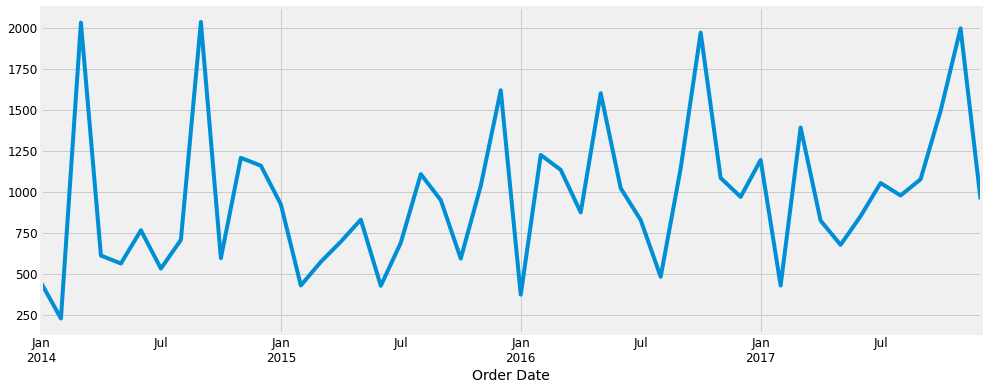

In [8]:
y.plot(figsize=(15, 6))
plt.show()

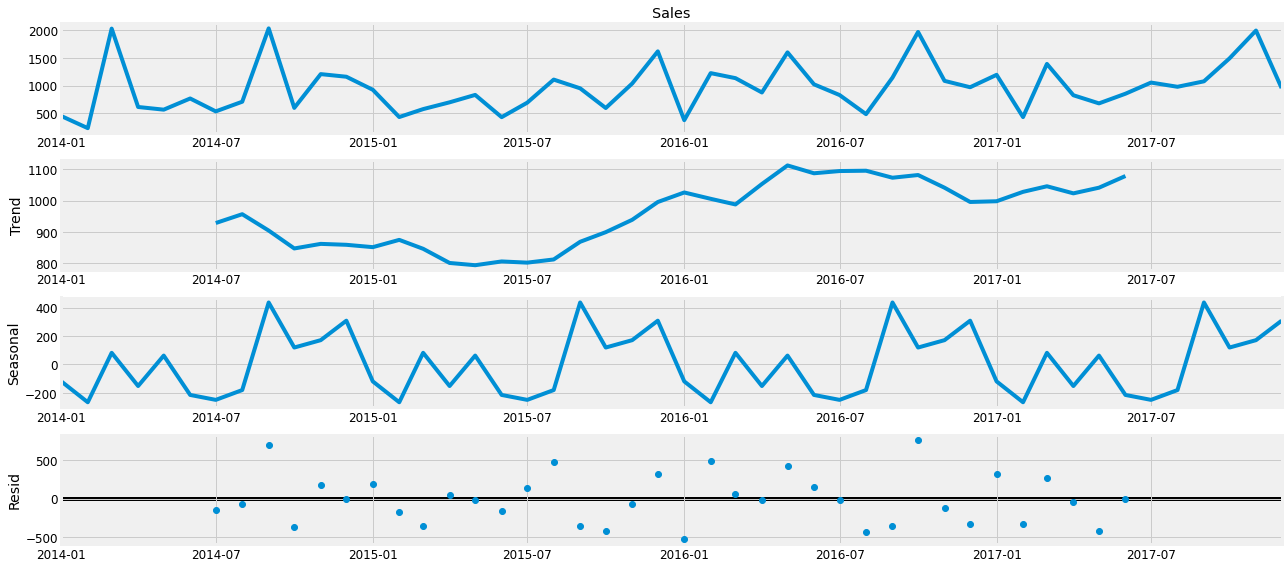

In [9]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [10]:
furniture = df.loc[df['Category'] == 'Furniture']
furniture['Order Date'].min(), furniture['Order Date'].max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [11]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)
furniture = furniture.sort_values('Order Date')
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [12]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()

In [13]:
furniture = furniture.set_index('Order Date')
furniture.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

In [14]:
y2 = furniture['Sales'].resample('MS').mean()

In [15]:
y2['2017':]

Order Date
2017-01-01     397.602133
2017-02-01     528.179800
2017-03-01     544.672240
2017-04-01     453.297905
2017-05-01     678.302328
2017-06-01     826.460291
2017-07-01     562.524857
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64

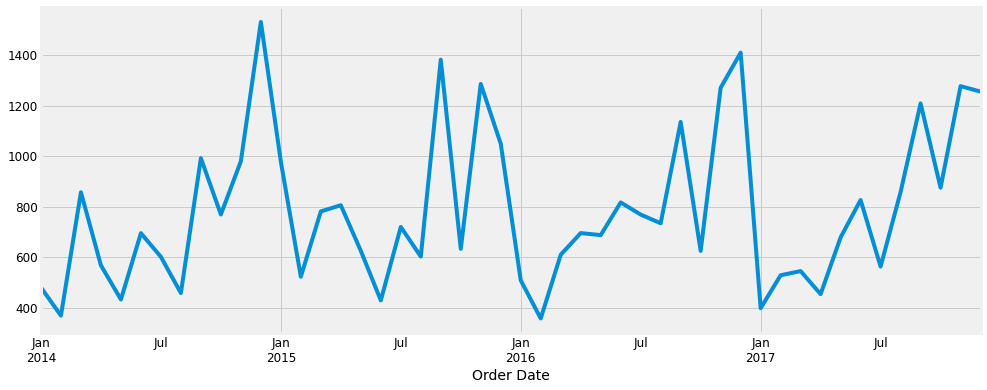

In [16]:
y2.plot(figsize=(15, 6))
plt.show()

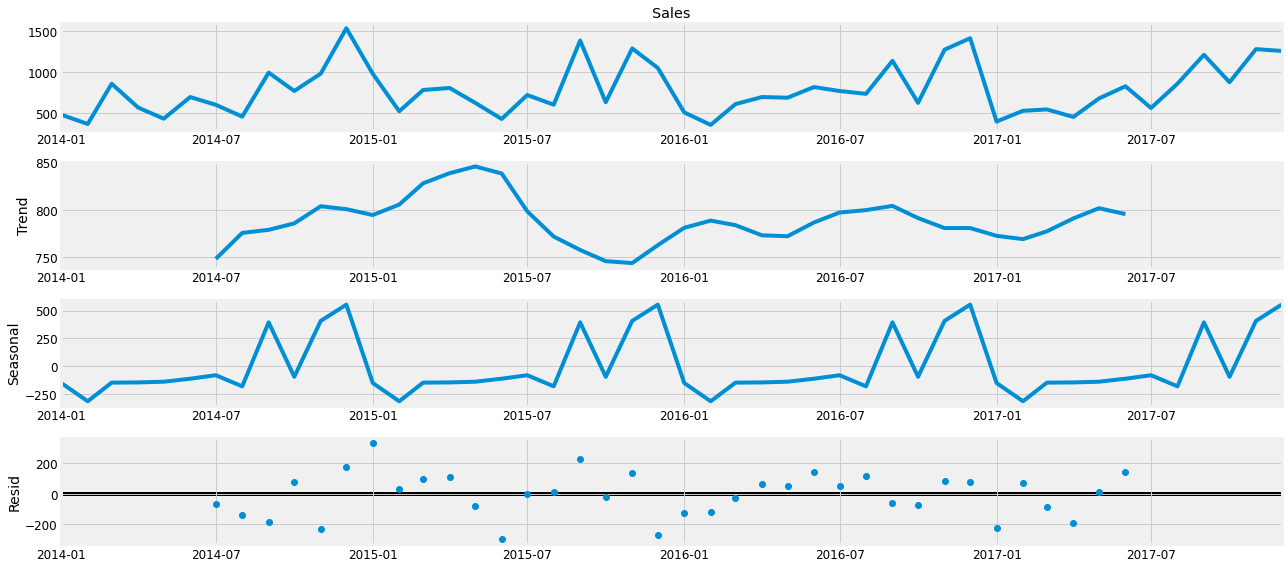

In [17]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y2, model='additive')
fig = decomposition.plot()
plt.show()

## ARIMA Model

### Technology 

In [18]:
technology = df.loc[df['Category'] == 'Technology']
office = df.loc[df['Category'] == 'Office Supplies']
furniture = df.loc[df['Category'] == 'Furniture']

In [19]:
technology.shape, office.shape, furniture.shape

((1847, 21), (6026, 21), (2121, 21))

In [20]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
technology.drop(cols, axis=1, inplace=True)
office.drop(cols, axis=1, inplace=True)
furniture.drop(cols, axis=1, inplace=True)

technology = technology.sort_values('Order Date')
office = office.sort_values('Order Date')
furniture = furniture.sort_values('Order Date')

technology = technology.groupby('Order Date')['Sales'].sum().reset_index()
office = office.groupby('Order Date')['Sales'].sum().reset_index()
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()

In [21]:
technology = technology.set_index('Order Date')
office = office.set_index('Order Date')
furniture = furniture.set_index('Order Date')

y_technology = technology['Sales'].resample('MS').mean()
y_office = office['Sales'].resample('MS').mean()
y_furniture = furniture['Sales'].resample('MS').mean()

technology = pd.DataFrame({'Order Date':y_technology.index, 'Sales':y_technology.values})
office = pd.DataFrame({'Order Date': y_office.index, 'Sales': y_office.values})
furniture = pd.DataFrame({'Order Date': y_furniture.index, 'Sales': y_furniture.values})

store = technology.merge(office, how='inner', on='Order Date')
store = store.merge(furniture, how='inner', on='Order Date')
store.rename(columns={'Sales_x': 'technology_sales', 'Sales_y': 'office_sales', 'Sales': 'furniture_sales'}, inplace=True)
store.head()

,Order Date,technology_sales,office_sales,furniture_sales
0,2014-01-01,449.041429,285.357647,480.194231
1,2014-02-01,229.787143,63.042588,367.931600
2,2014-03-01,2031.948375,391.176318,857.291529
3,2014-04-01,613.028933,464.794750,567.488357
4,2014-05-01,564.698588,324.346545,432.049188


In [22]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [23]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod_technology = sm.tsa.statespace.SARIMAX(y_technology, order = param,
                                           seasonal_order = param_seasonal,
                                           enforce_stationarity = False,
                                           enforce_invertibility = False)
            results_technology = mod_technology.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.22392D+00    |proj g|=  1.60799D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      2      3      1     0     0   3.027D-07   8.224D+00
  F =   8.2238455885520363     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.0

 This problem is unconstrained.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/stevenmacauda/.pyenv/versions/3.8.12/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  3.68334D+00    |proj g|=  3.75313D-03

At iterate   15    f=  3.68035D+00    |proj g|=  4.20414D-02

At iterate   20    f=  3.67160D+00    |proj g|=  9.17777D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     22     23      1     0     0   8.921D-06   3.672D+00
  F =   3.6715890827074591     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.83441D+00    |proj g|=  1.20523D-05

       

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f=  3.66547D+00    |proj g|=  1.56791D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28     34      1     0     0   2.636D-05   3.665D+00
  F =   3.6654638059337663     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.87945D+00    |proj g|=  2.88609D-01

At iterate    5    f=  7.83564D+00    |proj g|=  5.87262D-03

At iterate   10    f=  7.83287D+00    |proj g|=  9.73304D-02

At iter

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/stevenmacauda/.pyenv/versions/3.8.12/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.57633D+00    |proj g|=  2.81193D-01

At iterate    5    f=  3.50428D+00    |proj g|=  4.48241D-04

At iterate   10    f=  3.50426D+00    |proj g|=  2.78327D-03

At iterate   15    f=  3.50232D+00    |proj g|=  3.57032D-02

At iterate   20    f=  3.49179D+00    |proj g|=  9.13665D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     27      1     0     0   1.551D-06   3.492D+00
  F =   3.4915545413230262     

CONVERG

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.66948D+00    |proj g|=  1.94369D-02

At iterate   10    f=  5.66821D+00    |proj g|=  5.09199D-04

At iterate   15    f=  5.66816D+00    |proj g|=  1.05516D-02

At iterate   20    f=  5.66168D+00    |proj g|=  1.37186D-01

At iterate   25    f=  5.41957D+00    |proj g|=  2.26477D-01

At iterate   30    f=  5.40397D+00    |proj g|=  8.25375D-02

At iterate   35    f=  5.40138D+00    |proj g|=  2.69207D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     37     43      1     0     0   1.793D-05   5.401D+00
  F =   5.4013777039845436     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  3.83265D+00    |proj g|=  2.12960D-02

At iterate   20    f=  3.83204D+00    |proj g|=  1.34088D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     23      1     0     0   1.341D-06   3.832D+00
  F =   3.8320417352798395     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.57633D+00    |proj g|=  2.81193D-01

At iterate    5    f=  3.50532D+00    |proj g|=  7.97961D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/stevenmacauda/.pyenv/versions/3.8.12/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.



Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      4      7      1     0     0   2.121D-06   5.841D+00
  F =   5.8412352929347433     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.75101D+00    |proj g|=  1.94175D-01

At iterate    5    f=  3.68681D+00    |proj g|=  7.23938D-04

At iterate   10    f=  3.68629D+00    |proj g|=  1.71256D-02

At iterate   15    f=  3.65931D+00    |proj g|=  2.31160D-02

At iterate   20    f=  3.

 This problem is unconstrained.
 This problem is unconstrained.
/Users/stevenmacauda/.pyenv/versions/3.8.12/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.


  ys=-5.258E+01  -gs= 6.984E-01 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      5     70      5     4     0   6.750D+04   1.466D+01
  F =   14.661004338250910     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.88579D+00    |proj g|=  2.93232D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored d

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  7.01017D+00    |proj g|=  4.26690D-02

At iterate   15    f=  7.00110D+00    |proj g|=  1.07459D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     19     24      1     0     0   9.222D-07   7.000D+00
  F =   6.9995832265453837     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.69749D+01    |proj g|=  9.64364D-03

At iterate    5    f=  2.69593D+01    |proj g|=  3.30677D+01
  ys=-1.


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  5.35953D+00    |proj g|=  6.36296D-02

At iterate   20    f=  5.34938D+00    |proj g|=  1.39764D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     23     25      1     0     0   2.463D-07   5.349D+00
  F =   5.3493013383450405     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.42694D+00    |proj g|=  1.81989D-01

At iterate    5    f=  3.36696D+00    |proj g|=  3.00934D-04

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  5.42244D+00    |proj g|=  4.68573D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     24      1     0     0   4.555D-06   5.422D+00
  F =   5.4224399192021444     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.66827D+01    |proj g|=  9.65452D-03
  ys=-6.294E+05  -gs= 1.634E-02 BFGS update SKIPPED

At iterate    5    f=  1.52781D+01    |proj g|=  1.16170D+06

           * * *



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.70597D+00    |proj g|=  3.34828D-02

At iterate    5    f=  3.70531D+00    |proj g|=  2.65714D-04

At iterate   10    f=  3.70521D+00    |proj g|=  1.43774D-02

At iterate   15    f=  3.69495D+00    |proj g|=  1.19551D-01

At iterate   20    f=  3.68253D+00    |proj g|=  1.03689D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     26      1     0     0   1.397D-06   3.683D+00
  F =   3.6825321278691336     

CONVERG

 This problem is unconstrained.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/stevenmacauda/.pyenv/versions/3.8.12/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7     95      2     2     0   1.077D+05   1.543D+01
  F =   15.434939933866355     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.69033D+00    |proj g|=  3.79119D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.74521D+00    |proj g|=  2.48748D-01

At iterate    5    f=  3.68540D+00    |proj g|=  1.37563D-02

At iterate   10    f=  3.68359D+00    |proj g|=  6.96313D-04

At iterate   15    f=  3.68356D+00    |proj g|=  2.15368D-03

At iterate   20    f=  3.67970D+00    |proj g|=  3.73097D-02

At iterate   25    f=  3.66394D+00    |proj g|=  1.18489D-02

At iterate   30    f=  3.66320D+00    |proj g|=  1.44295D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     14      1     0     0   1.513D-04   7.228D+00
  F =   7.2280995527318188     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.86795D+01    |proj g|=  3.39810D-02
  ys=-1.364E+07  -gs= 1.179E-01 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored d

/Users/stevenmacauda/.pyenv/versions/3.8.12/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.54422D+00    |proj g|=  1.46291D-02

At iterate    5    f=  5.53255D+00    |proj g|=  1.81600D-03

At iterate   10    f=  5.53254D+00    |proj g|=  1.75057D-03

At iterate   15    f=  5.53229D+00    |proj g|=  2.12971D-02

At iterate   20    f=  5.53021D+00    |proj g|=  2.40834D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     27      1     0     0   1.458D-06   5.530D+00
  F =   5.5302039074000753     

CONVERG

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  5.26424D+00    |proj g|=  7.56834D-01

At iterate   20    f=  5.26210D+00    |proj g|=  4.57880D-04

At iterate   25    f=  5.26209D+00    |proj g|=  3.79352D-02

At iterate   30    f=  5.26153D+00    |proj g|=  3.13684D-01

At iterate   35    f=  5.26053D+00    |proj g|=  8.40622D-02

At iterate   40    f=  5.25910D+00    |proj g|=  3.58537D-01

At iterate   45    f=  5.24020D+00    |proj g|=  3.29776D-02

At iterate   50    f=  5.23974D+00    |proj g|=  1.36833D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     61      1     0     0   1.368D-04   5.240D+00
  F =   5.23973892751

/Users/stevenmacauda/.pyenv/versions/3.8.12/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  3.68037D+00    |proj g|=  1.71724D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     31      1     0     0   1.582D-06   3.680D+00
  F =   3.6803638103906007     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.58125D+00    |proj g|=  2.89647D-01

At iterate    5    f=  3.50522D+00    |proj g|=  6.20331D-03

At iterate   10    f=  3.49284D+00    |proj g|=  2.91072D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-4.004E+03  -gs= 7.082E-01 BFGS update SKIPPED

At iterate    5    f=  1.46738D+01    |proj g|=  2.35078D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6    122      3     2     0   2.351D+04   1.467D+01
  F =   14.673782122876915     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.74436D+00    |proj g|=  4.53015D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of fu


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/stevenmacauda/.pyenv/versions/3.8.12/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  3.63030D+00    |proj g|=  6.46445D-02

At iterate   20    f=  3.61343D+00    |proj g|=  1.44515D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     27      1     0     0   4.377D-06   3.613D+00
  F =   3.6134150653386907     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.39833D+00    |proj g|=  2.96618D-02

At iterate    5    f=  5.39755D+00    |proj g|=  1.11396D-03

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/stevenmacauda/.pyenv/versions/3.8.12/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.51533D+01    |proj g|=  1.12331D+05
  ys=-4.927E+01  -gs= 6.965E-01 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      6     98      3     3     0   1.123D+05   1.515D+01
  F =   15.153319523822779     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.64934D+00    |proj g|=  8.62335D-03

At iterate    5    f=  3.64926D+00    |proj g|=  5.74690D-04

At iterate   10  

 This problem is unconstrained.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/stevenmacauda/.pyenv/versions/3.8.12/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      5     65      2     0     0   2.107D+06   8.372D+00
  F =   8.3722492685320606     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.36330D+00    |proj g|=  1.11138D-01

At iterate    5    f=  5.35423D+00    |proj g|=  2.73660D-04

At iterate   10    f=  5.35422D+00    |proj g|=  3.12826D-03

At iterate   15    f=  5.35386D+00    |proj g|=  3.36000D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  3.31780D+00    |proj g|=  2.84308D+06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      5     53      2     1     0   2.843D+06   3.318D+00
  F =   3.3178003061018386     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.53607D+00    |proj g|=  6.77473D-02

At iterate    5    f=  3.52753D+00    |proj g|=  2.97533D-04

At iterate   10    f=  3.52740D+00    |proj g|=  9.46541D-03

At iter

 This problem is unconstrained.



At iterate   15    f=  3.36020D+00    |proj g|=  2.84595D-03

At iterate   20    f=  3.35788D+00    |proj g|=  2.19124D-02

At iterate   25    f=  3.31806D+00    |proj g|=  2.56510D-02

At iterate   30    f=  3.31617D+00    |proj g|=  5.56108D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     34     38      1     0     0   2.874D-06   3.316D+00
  F =   3.3161290787182600     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


In [24]:
mod_technology = sm.tsa.statespace.SARIMAX(y_technology,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_invertibility=False)

results_technology = mod_technology.fit()

print(results_technology.summary().tables[1])

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.66664D+00    |proj g|=  8.67247D-02

At iterate    5    f=  5.65409D+00    |proj g|=  1.06266D-03

At iterate   10    f=  5.65408D+00    |proj g|=  5.48102D-03

At iterate   15    f=  5.65216D+00    |proj g|=  7.76804D-02

At iterate   20    f=  5.61887D+00    |proj g|=  1.09751D-01

At iterate   25    f=  5.61137D+00    |proj g|=  1.80346D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     27     31      1     0     0   

 This problem is unconstrained.


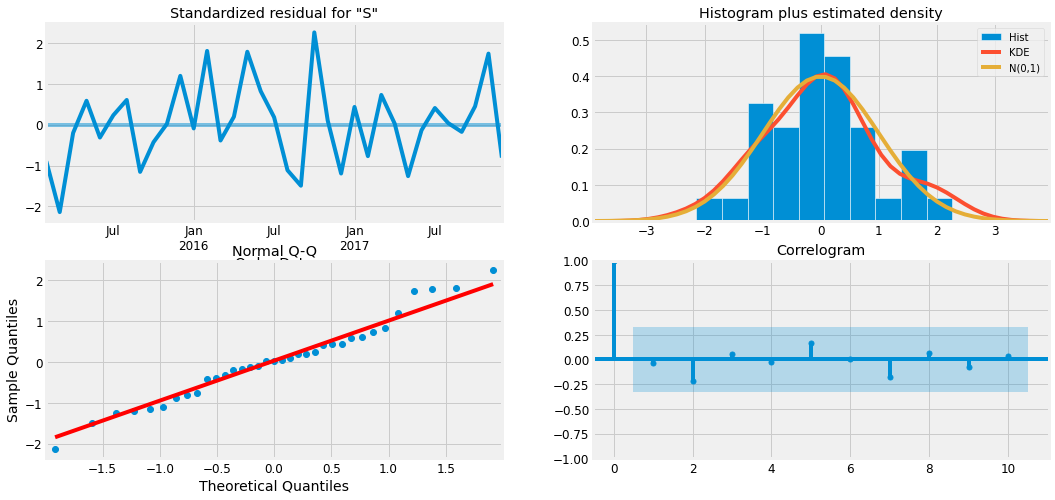

In [25]:
results_technology.plot_diagnostics(figsize=(16, 8))
plt.show()

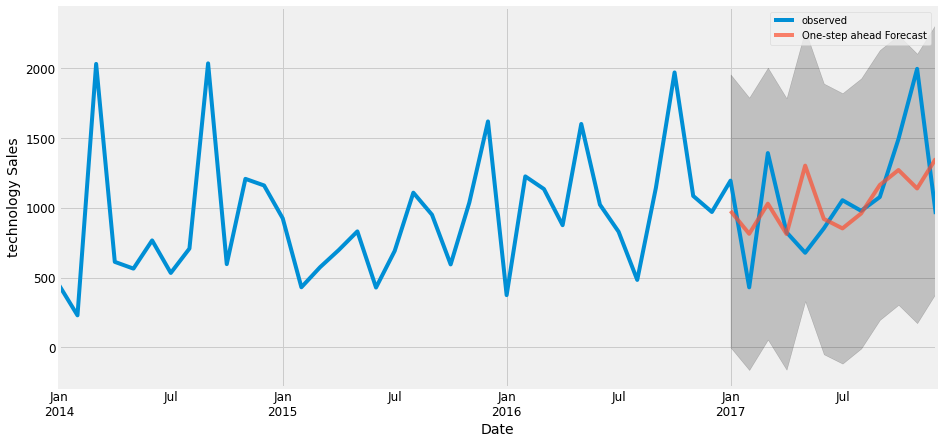

In [26]:
pred_technology = results_technology.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci_technology = pred_technology.conf_int()

ax = y_technology['2014':].plot(label='observed')
pred_technology.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci_technology.index,
                pred_ci_technology.iloc[:, 0],
                pred_ci_technology.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('technology Sales')
plt.legend()

plt.show()

In [27]:
from sklearn.metrics import r2_score, mean_absolute_error
y_forecasted_technology = pred_technology.predicted_mean
y_truth_technology = y_technology['2017-01-01':]

# Compute the mean square error
mse_technology = ((y_forecasted_technology - y_truth_technology) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse_technology, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse_technology), 2)))
print('The R-squared of our forecasts is {}'.format(r2_score(y_forecasted_technology, y_truth_technology)))
print("Mean absolute error value is ",mean_absolute_error(y_forecasted_technology, y_truth_technology))

The Mean Squared Error of our forecasts is 142623.98
The Root Mean Squared Error of our forecasts is 377.66
The R-squared of our forecasts is -3.2096305955992808
Mean absolute error value is  287.66843212400266


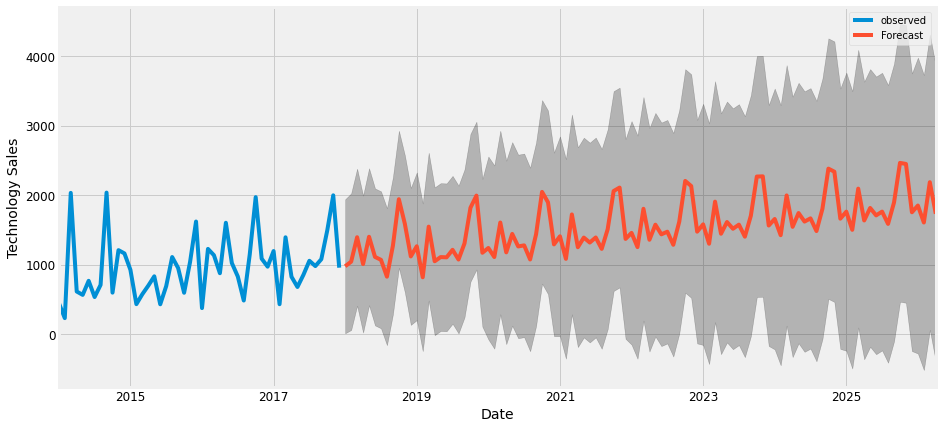

In [28]:
pred_uc_technology = results_technology.get_forecast(steps=100)
pred_ci_technology = pred_uc_technology.conf_int()

ax = y_technology.plot(label='observed', figsize=(14, 7))
pred_uc_technology.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci_technology.index,
                pred_ci_technology.iloc[:, 0],
                pred_ci_technology.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Technology Sales')

plt.legend()
plt.show()

### Furniture

In [29]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [30]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod_furniture = sm.tsa.statespace.SARIMAX(y_furniture,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_invertibility=False)

            results_furniture = mod_furniture.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

 This problem is unconstrained.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/stevenmacauda/.pyenv/versions/3.8.12/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.15333D+00    |proj g|=  1.77636D-10

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   1.776D-10   8.153D+00
  F =   8.1533264604570608     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.9

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/stevenmacauda/.pyenv/versions/3.8.12/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8    109      2     3     0   7.920D+05   1.308D+01
  F =   13.080451999487517     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.11290D+00    |proj g|=  1.20437D-01

At iterate    5    f=  5.10059D+00    |proj g|=  6.61879D-03

At iterate   10    f=  5.08737D+00    |proj g|=  7.27325D-02

At iterate   15    f=  5.07556D+00    |proj g|=  9.11770D-05

       

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.06842D+01    |proj g|=  1.03129D-02

At iterate    5    f=  4.06584D+01    |proj g|=  1.07437D-01
  ys=-3.743E+01  -gs= 9.751E-01 BFGS update SKIPPED
  ys=-3.429E+01  -gs= 9.999E-01 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     89      2     2     0   1.476D+04   2.167D+01
  F =   21.665516578396332     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/stevenmacauda/.pyenv/versions/3.8.12/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.13750D+00    |proj g|=  2.96550D-02

At iterate    5    f=  5.13701D+00    |proj g|=  9.86053D-04

At iterate   10    f=  5.13686D+00    |proj g|=  1.51372D-02

At iterate   15    f=  5.13588D+00    |proj g|=  6.98120D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     18     21      1     0     0   4.485D-07   5.136D+00
  F =   5.1358807903327266     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.


  ys=-3.343E+01  -gs= 9.716E-01 BFGS update SKIPPED

At iterate   15    f=  2.31499D+01    |proj g|=  1.25182D+04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/stevenmacauda/.pyenv/versions/3.8.12/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17    135      3     3     0   1.623D+05   1.921D+01
  F =   19.206863671428476     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.08100D+00    |proj g|=  2.71652D-02

At iterate    5    f=  5.08008D+00    |proj g|=  7.92781D-04

At iterate   10    f=  5.07961D+00    |proj g|=  2.19737D-02

At iterate   15    f=  5.07501D+00    |proj g|=  4.10710D-03

       

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f=  5.05864D+00    |proj g|=  4.40262D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     28     31      1     0     0   8.690D-06   5.059D+00
  F =   5.0586390857831569     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.18416D+00    |proj g|=  5.66494D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      7    104      2     2     0   4.717D+05   1.636D+01
  F =   16.362164032511370     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.22017D+00    |proj g|=  1.04818D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

/Users/stevenmacauda/.pyenv/versions/3.8.12/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


  ys=-1.255E+02  -gs= 9.719E-01 BFGS update SKIPPED

At iterate   10    f=  2.01495D+01    |proj g|=  5.91239D+04
  ys=-1.741E+00  -gs= 7.875E-01 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12    113      3     2     0   1.899D+05   1.794D+01
  F =   17.935728768329614     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.21020D+00    |proj g|=  1.04011D-01

At iterate    5    f=  5.19


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/stevenmacauda/.pyenv/versions/3.8.12/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate   10    f=  5.19159D+00    |proj g|=  6.88584D-02

At iterate   15    f=  5.16779D+00    |proj g|=  1.29303D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     18     21      1     0     0   8.229D-07   5.168D+00
  F =   5.1677817440118492     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.20010D+00    |proj g|=  1.65626D-01

At iterate    5    f=  5.15729D+00    |proj g|=  4.33297D-04

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  3.80088D+01    |proj g|=  2.78175D-01
  ys=-2.145E+02  -gs= 9.749E-01 BFGS update SKIPPED
  ys=-3.358E+01  -gs= 9.522E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/stevenmacauda/.pyenv/versions/3.8.12/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10    125      3     2     0   1.996D+05   1.898D+01
  F =   18.977020040193150     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.07796D+00    |proj g|=  8.60975D-02

At iterate    5    f=  5.06507D+00    |proj g|=  4.56653D-04

At iterate   10    f=  5.06474D+00    |proj g|=  1.44089D-02

At iterate   15    f=  5.05879D+00    |proj g|=  9.28369D-03

       

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  6.90617D+00    |proj g|=  1.51339D-03

At iterate   10    f=  6.80402D+00    |proj g|=  6.88223D-02

At iterate   15    f=  6.77626D+00    |proj g|=  7.89691D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     36      1     0     0   4.345D-06   6.776D+00
  F =   6.7762235340397643     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.66281D+01    |proj g|=  1.03665D-01

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


  ys=-3.786E+01  -gs= 9.525E-01 BFGS update SKIPPED

At iterate   15    f=  1.96775D+01    |proj g|=  8.33147D+04
  ys=-3.938E+01  -gs= 9.544E-01 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18    111      2     3     0   2.862D+04   1.907D+01
  F =   19.070924609822310     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.03740D+00    |proj g|=  9.04964D-02

At iterate    5    f=  5.01

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  4.99936D+00    |proj g|=  7.06349D-02

At iterate   20    f=  4.98658D+00    |proj g|=  1.13120D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     27      1     0     0   4.684D-06   4.987D+00
  F =   4.9865799455201500     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.07796D+00    |proj g|=  2.15436D-01

At iterate    5    f=  5.01464D+00    |proj g|=  3.51472D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/stevenmacauda/.pyenv/versions/3.8.12/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate   10    f=  7.33210D+00    |proj g|=  1.50720D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     11     13      1     0     0   8.454D-06   7.332D+00
  F =   7.3320959830982106     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.98585D+01    |proj g|=  7.49298D-03

At iterate    5    f=  2.86186D+01    |proj g|=  2.12381D+02
  ys=-2.654E+01  -gs= 9.649E-01 BFGS update SKIPPED
  ys=-3.718E+01  -

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


At iterate    5    f=  5.06952D+00    |proj g|=  6.35391D-04

At iterate   10    f=  5.06929D+00    |proj g|=  1.34829D-02

At iterate   15    f=  5.06253D+00    |proj g|=  6.23571D-02

At iterate   20    f=  5.05879D+00    |proj g|=  2.33185D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     24      1     0     0   1.466D-06   5.059D+00
  F =   5.0587860329996994     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At itera


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/stevenmacauda/.pyenv/versions/3.8.12/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14    133      2     4     0   3.932D+05   1.710D+01
  F =   17.096042160387132     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.07940D+00    |proj g|=  3.00782D-02

At iterate    5    f=  5.07808D+00    |proj g|=  8.94828D-04

At iterate   10    f=  5.07756D+00    |proj g|=  1.67179D-02

At iterate   15    f=  5.07488D+00    |proj g|=  1.52831D-03

       

 This problem is unconstrained.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/stevenmacauda/.pyenv/versions/3.8.12/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate    5    f=  2.28698D+01    |proj g|=  7.36750D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      7    125      3     2     0   6.494D+04   2.189D+01
  F =   21.885540638054195     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.14160D+00    |proj g|=  5.71167D-02

At iterate    5    f=  5.14057D+00    |proj g|=  9.23751D-03

At iterate   10    f=  5.13653D+00    |proj g|=  4.24403D-02

At iter

 This problem is unconstrained.



At iterate   10    f=  5.07249D+00    |proj g|=  2.25055D-02

At iterate   15    f=  5.07042D+00    |proj g|=  1.36456D-03

At iterate   20    f=  5.06989D+00    |proj g|=  4.49084D-03

At iterate   25    f=  5.06233D+00    |proj g|=  1.56101D-02

At iterate   30    f=  5.06056D+00    |proj g|=  3.47376D-03

At iterate   35    f=  5.05964D+00    |proj g|=  7.95223D-03

At iterate   40    f=  5.05789D+00    |proj g|=  1.76391D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     43     59      1     0     0   3.979D-06   5.058D+00
  F =   5.0578902454037413     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  7.08462D+00    |proj g|=  1.34397D-01

At iterate   15    f=  7.05013D+00    |proj g|=  3.02760D-02

At iterate   20    f=  7.04541D+00    |proj g|=  1.59985D-03

At iterate   25    f=  7.04036D+00    |proj g|=  2.61914D-01

At iterate   30    f=  6.99837D+00    |proj g|=  4.18330D-01

At iterate   35    f=  6.93046D+00    |proj g|=  2.15496D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     39     52      1     0     0   1.653D-03   6.930D+00
  F =   6.9302169406107081     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/stevenmacauda/.pyenv/versions/3.8.12/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate   10    f=  5.07975D+00    |proj g|=  1.68369D-02

At iterate   15    f=  5.07734D+00    |proj g|=  1.04731D-03

At iterate   20    f=  5.07674D+00    |proj g|=  1.73010D-02

At iterate   25    f=  5.07379D+00    |proj g|=  1.49459D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     28     34      1     0     0   2.397D-06   5.074D+00
  F =   5.0737777834914475     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   25    f=  5.06884D+00    |proj g|=  9.12013D-03

At iterate   30    f=  5.05712D+00    |proj g|=  1.61337D-02

At iterate   35    f=  5.05571D+00    |proj g|=  6.21379D-03

At iterate   40    f=  5.05546D+00    |proj g|=  1.57945D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     44     54      1     0     0   1.185D-05   5.055D+00
  F =   5.0554573478014131     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/stevenmacauda/.pyenv/versions/3.8.12/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.


  ys=-5.109E+02  -gs= 9.773E-01 BFGS update SKIPPED
  ys=-4.493E+01  -gs= 9.587E-01 BFGS update SKIPPED

At iterate    5    f=  1.86312D+01    |proj g|=  2.37298D+05
  ys=-5.455E-02  -gs= 4.478E-01 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6     86      4     3     0   2.373D+05   1.863D+01
  F =   18.631172728706424     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.10745D+00   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  5.04830D+00    |proj g|=  1.25373D-03

At iterate   20    f=  5.04822D+00    |proj g|=  4.95209D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     29      1     0     0   6.842D-06   5.048D+00
  F =   5.0481695334624268     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.95336D+00    |proj g|=  6.09824D-02

At iterate    5    f=  6.94482D+00    |proj g|=  1.24245D-03

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/stevenmacauda/.pyenv/versions/3.8.12/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.06477D+00    |proj g|=  2.33477D-02

At iterate   15    f=  5.06099D+00    |proj g|=  1.30588D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     17     20      1     0     0   3.320D-06   5.061D+00
  F =   5.0609812621708761     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.10745D+00    |proj g|=  1.99473D-01

At iterate    5    f=  5.06004D+00    |proj g|=  5.15030D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


At iterate   10    f=  7.01480D+00    |proj g|=  5.50545D-04

At iterate   15    f=  7.01470D+00    |proj g|=  1.39018D-02

At iterate   20    f=  7.00652D+00    |proj g|=  2.80147D-02

At iterate   25    f=  7.00431D+00    |proj g|=  1.76404D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     35      1     0     0   6.612D-07   7.004D+00
  F =   7.0043086251654101     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At itera


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/stevenmacauda/.pyenv/versions/3.8.12/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.


At iterate    5    f=  5.01261D+00    |proj g|=  3.71120D-02

At iterate   10    f=  5.00873D+00    |proj g|=  9.79365D-04

At iterate   15    f=  5.00848D+00    |proj g|=  1.97599D-02

At iterate   20    f=  4.97490D+00    |proj g|=  8.32389D-02

At iterate   25    f=  4.96474D+00    |proj g|=  1.01136D-02

At iterate   30    f=  4.96452D+00    |proj g|=  2.43285D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     33     37      1     0     0   2.311D-06   4.965D+00
  F =   4.9645173729622494     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  6.78348D+00    |proj g|=  1.21688D-01

At iterate   25    f=  6.75567D+00    |proj g|=  3.18357D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     29     43      1     0     0   8.990D-06   6.756D+00
  F =   6.7555667174514191     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.66264D+01    |proj g|=  1.03670D-01

At iterate    5    f=  3.65858D+01    |proj g|=  2.91121D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.01345D+00    |proj g|=  6.35790D-02

At iterate   10    f=  5.00824D+00    |proj g|=  2.96565D-03

At iterate   15    f=  5.00814D+00    |proj g|=  3.18525D-03

At iterate   20    f=  5.00509D+00    |proj g|=  4.18692D-02

At iterate   25    f=  4.96998D+00    |proj g|=  4.48097D-02

At iterate   30    f=  4.96445D+00    |proj g|=  3.97907D-03

At iterate   35    f=  4.96440D+00    |proj g|=  3.05036D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     35     40      1     0     0   3.050D-06   4.964D+00
  F =   4.9643973998931283     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

In [31]:
mod_furniture = sm.tsa.statespace.SARIMAX(y2,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_invertibility=False)

results_furniture = mod_furniture.fit()

print(results_furniture.summary().tables[1])

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.04808D+00    |proj g|=  8.88357D-02

At iterate    5    f=  5.01487D+00    |proj g|=  2.85906D-02

At iterate   10    f=  5.01305D+00    |proj g|=  8.83301D-04

At iterate   15    f=  5.01275D+00    |proj g|=  1.18778D-02

At iterate   20    f=  4.99531D+00    |proj g|=  9.50057D-02

At iterate   25    f=  4.98503D+00    |proj g|=  1.23488D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     28     37      1     0     0   

 This problem is unconstrained.


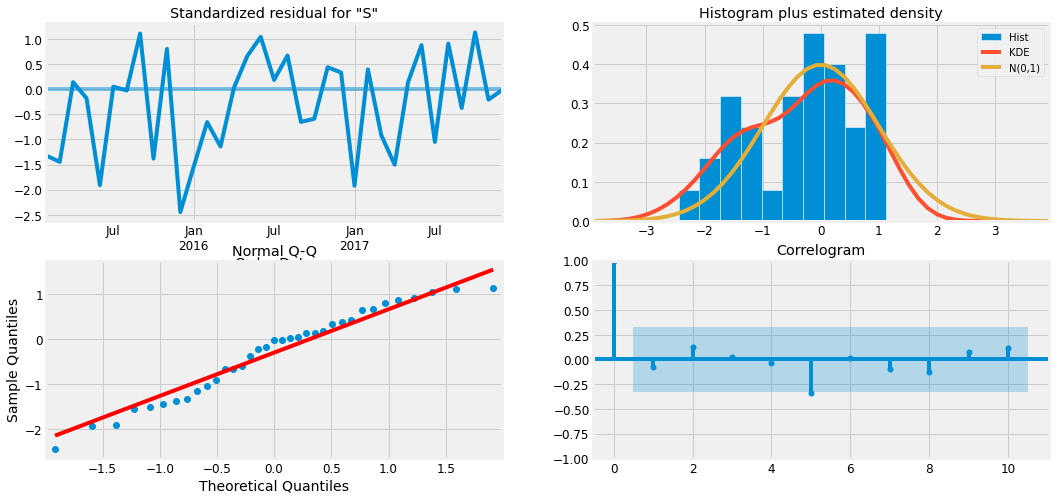

In [32]:
results_furniture.plot_diagnostics(figsize=(16, 8))
plt.show()

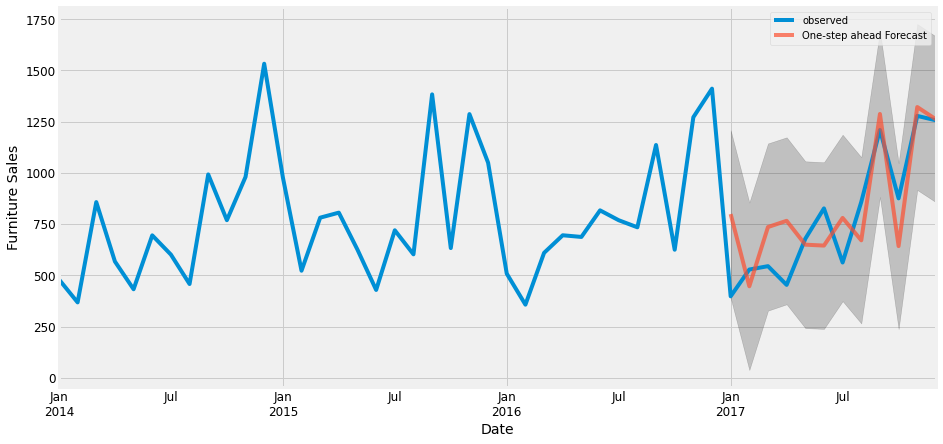

In [33]:
pred_furniture = results_furniture.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred_furniture.conf_int()

ax = y_furniture['2014':].plot(label='observed')
pred_furniture.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()

plt.show()

In [34]:
from sklearn.metrics import r2_score, accuracy_score, mean_absolute_error
y_forecasted_furniture = pred_furniture.predicted_mean
y_truth_furniture = y_furniture['2017-01-01':]

# Compute the mean square error
mse_furniture = ((y_forecasted_furniture - y_truth_furniture) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse_furniture, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse_furniture), 2)))
print('The R-squared of our forecasts is {}'.format(r2_score(y_forecasted_furniture, y_truth_furniture)))
print("Mean absolute error value is ",mean_absolute_error(y_forecasted_furniture, y_truth_furniture))

The Mean Squared Error of our forecasts is 39996.01
The Root Mean Squared Error of our forecasts is 199.99
The R-squared of our forecasts is 0.48202931009634387
Mean absolute error value is  163.29967425764036


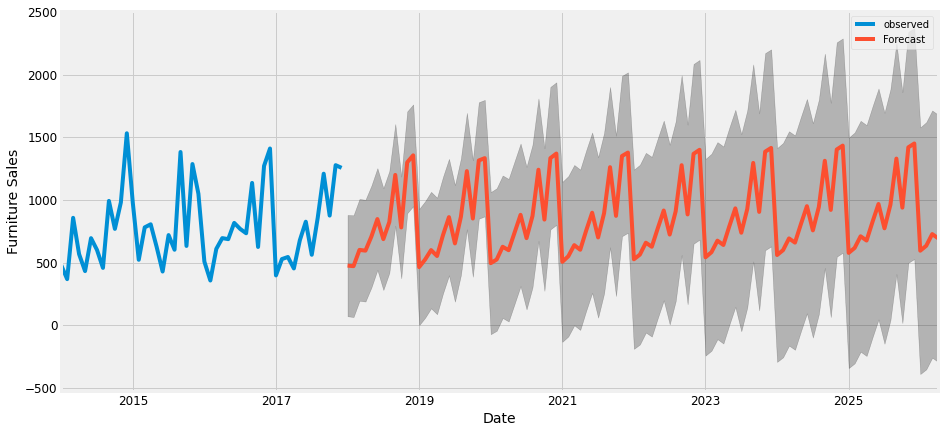

In [35]:
pred_uc_furniture = results_furniture.get_forecast(steps=100)
pred_ci_furniture = pred_uc_furniture.conf_int()

ax = y_furniture.plot(label='observed', figsize=(14, 7))
pred_uc_furniture.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci_furniture.index,
                pred_ci_furniture.iloc[:, 0],
                pred_ci_furniture.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')

plt.legend()
plt.show()

### Office Supplies

In [36]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [37]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod_office = sm.tsa.statespace.SARIMAX(y_office,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_invertibility=False)

            results_office = mod_office.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.91904D+00    |proj g|=  1.77636D-10

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   1.776D-10   7.919D+00
  F =   7.9190431749162142     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.0

 This problem is unconstrained.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/stevenmacauda/.pyenv/versions/3.8.12/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  7.31708D+00    |proj g|=  2.85638D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     20     21      1     0     0   2.856D-07   7.317D+00
  F =   7.3170770758162744     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.73050D+01    |proj g|=  3.20967D-03

At iterate    5    f=  1.89136D+01    |proj g|=  7.52156D+04

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/stevenmacauda/.pyenv/versions/3.8.12/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.33823D+00    |proj g|=  1.86639D-01

At iterate    5    f=  5.30381D+00    |proj g|=  6.22654D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     11      1     0     0   3.269D-05   5.304D+00
  F =   5.3037403963664955     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 v

 This problem is unconstrained.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-8.128E+01  -gs= 9.875E-01 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     88      3     3     0   6.784D+04   2.264D+01
  F =   22.639895568477517     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.32902D+00    |proj g|=  1.03601D-02

At iterate    5    f=  5.32895D+00    |proj g|=  1.88244D-03

At iterate   10    f=  5.32858D+00    |proj g|=  1.97102D-02

           * * *


/Users/stevenmacauda/.pyenv/versions/3.8.12/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  7.57731D+00    |proj g|=  1.01397D-01

At iterate   20    f=  7.34624D+00    |proj g|=  4.89908D-02

At iterate   25    f=  7.25534D+00    |proj g|=  4.78288D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     36      1     0     0   3.895D-06   7.255D+00
  F =   7.2553374195008260     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.80864D+01    |proj g|=  8.83624D-03

At iter

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/stevenmacauda/.pyenv/versions/3.8.12/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     97      2     1     0   1.753D+05   1.845D+01
  F =   18.446875241138795     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.29360D+00    |proj g|=  1.03039D-01

At iterate    5    f=  5.28659D+00    |proj g|=  5.46706D-04

At iterate   10    f=  5.28625D+00    |proj g|=  1.41004D-02

At iterate   15    f=  5.27865D+00    |proj g|=  4.41954D-02

       

 This problem is unconstrained.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/stevenmacauda/.pyenv/versions/3.8.12/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      6    108      2     3     0   4.208D+05   1.627D+01
  F =   16.270058010567237     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.39598D+00    |proj g|=  8.23626D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  2.80247D+01    |proj g|=  1.29757D+02
  ys=-3.083E+01  -gs= 9.499E-01 BFGS update SKIPPED
  ys=-1.246E+01  -gs= 9.729E-01 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     93      2     2     0   5.995D+04   2.051D+01
  F =   20.513511113506187     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.26221D+00    |proj g|=  4.65327D-02

At iterate    5    f=  5.25


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/stevenmacauda/.pyenv/versions/3.8.12/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  5.25202D+00    |proj g|=  5.48505D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     18     20      1     0     0   7.007D-07   5.252D+00
  F =   5.2519520524633432     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.37586D+00    |proj g|=  3.17754D-01

At iterate    5    f=  5.27682D+00    |proj g|=  7.77034D-03

At iterate   10    f=  5.27631D+00    |proj g|=  4.92061D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.73239D+01    |proj g|=  1.16919D-02

At iterate    5    f=  2.97083D+01    |proj g|=  1.77346D+01
  ys=-4.383E+01  -gs= 9.688E-01 BFGS update SKIPPED
  ys=-7.754E+01  -gs= 1.002E+00 BFGS update SKIPPED
  ys=-1.653E+00  -gs= 6.894E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/stevenmacauda/.pyenv/versions/3.8.12/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9    102      2     3     0   2.649D+05   1.852D+01
  F =   18.522708395392783     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.21522D+00    |proj g|=  1.20950D-01

At iterate    5    f=  5.20102D+00    |proj g|=  5.08168D-04

At iterate   10    f=  5.20095D+00    |proj g|=  1.46865D-02

At iterate   15    f=  5.19366D+00    |proj g|=  1.30628D-01

At iter

 This problem is unconstrained.
 This problem is unconstrained.


  ys=-3.464E+01  -gs= 9.570E-01 BFGS update SKIPPED

At iterate   15    f=  2.01082D+01    |proj g|=  1.63790D+05
  ys=-6.060E+01  -gs= 9.630E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/stevenmacauda/.pyenv/versions/3.8.12/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17    121      2     2     0   1.424D+05   1.991D+01
  F =   19.913381078239535     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.19089D+00    |proj g|=  7.74306D-02

At iterate    5    f=  5.15922D+00    |proj g|=  8.29667D-04

At iterate   10    f=  5.15682D+00    |proj g|=  2.77218D-02

At iterate   15    f=  5.12742D+00    |proj g|=  5.33580D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.15573D+00    |proj g|=  5.51076D-03

At iterate   15    f=  5.14752D+00    |proj g|=  6.89919D-02

At iterate   20    f=  5.10518D+00    |proj g|=  4.25559D-03

At iterate   25    f=  5.10487D+00    |proj g|=  1.70966D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     29     32      1     0     0   2.610D-05   5.105D+00
  F =   5.1048577003030609     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/stevenmacauda/.pyenv/versions/3.8.12/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.32568D+00    |proj g|=  2.14579D-01

At iterate    5    f=  5.27891D+00    |proj g|=  5.14733D-04

At iterate   10    f=  5.27862D+00    |proj g|=  1.56118D-02

At iterate   15    f=  5.27179D+00    |proj g|=  5.27765D-02

At iterate   20    f=  5.26853D+00    |proj g|=  8.07088D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     23      1     0     0   8.071D-07   5.269D+00
  F =   5.2685310684796152     

CONVERG

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.73574D+01    |proj g|=  8.21277D-03

At iterate    5    f=  3.73369D+01    |proj g|=  3.10914D-03

At iterate   10    f=  3.72673D+01    |proj g|=  1.19737D-01
  ys=-5.459E+01  -gs= 5.389E-01 BFGS update SKIPPED
  ys=-8.251E+01  -gs= 9.844E-01 BFGS update SKIPPED
  ys=-5.418E+01  -gs= 9.822E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/stevenmacauda/.pyenv/versions/3.8.12/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.


  ys=-2.809E+01  -gs= 9.665E-01 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     15    112      3     4     0   2.837D+04   2.155D+01
  F =   21.554045661319510     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.28182D+00    |proj g|=  9.09675D-02

At iterate    5    f=  5.27433D+00    |proj g|=  5.39870D-04

At iterate   10    f=  5.27383D+00    |proj g|=  1.39524D-02

At iterate   15  

 This problem is unconstrained.
 This problem is unconstrained.


  ys=-3.266E+01  -gs= 9.672E-01 BFGS update SKIPPED
  ys=-2.177E+02  -gs= 9.953E-01 BFGS update SKIPPED

At iterate   10    f=  2.38815D+01    |proj g|=  4.68036D+04
  ys=-4.478E+00  -gs= 8.049E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/stevenmacauda/.pyenv/versions/3.8.12/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12    140      4     4     0   3.072D+05   2.025D+01
  F =   20.248427452640112     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.31451D+00    |proj g|=  1.41284D-02

At iterate    5    f=  5.31441D+00    |proj g|=  1.39079D-02

At iterate   10    f=  5.31417D+00    |proj g|=  3.98000D-04

At iterate   15    f=  5.31417D+00    |proj g|=  2.85540D-03

At iter

 This problem is unconstrained.



At iterate   30    f=  5.24058D+00    |proj g|=  2.87158D-02

At iterate   35    f=  5.23502D+00    |proj g|=  1.46533D-01

At iterate   40    f=  5.23251D+00    |proj g|=  1.27560D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     42     50      1     0     0   3.847D-05   5.233D+00
  F =   5.2325138575099102     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.48782D+01    |proj g|=  9.14542D+01

At iter

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.71904D+01    |proj g|=  2.29464D-02

At iterate    5    f=  3.71677D+01    |proj g|=  1.42891D-02

At iterate   10    f=  2.87089D+01    |proj g|=  2.26188D+01
  ys=-5.747E+01  -gs= 9.880E-01 BFGS update SKIPPED
  ys=-2.739E+01  -gs= 9.655E-01 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     13    102      2     2     0   3.950D+04   2.104D+01
  F =   21.035029965208064     

ABNORMAL_TERMINATION_IN_LNS


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/stevenmacauda/.pyenv/versions/3.8.12/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate    5    f=  5.26230D+00    |proj g|=  1.76662D-03

At iterate   10    f=  5.26145D+00    |proj g|=  1.57748D-02

At iterate   15    f=  5.26133D+00    |proj g|=  3.20080D-03

At iterate   20    f=  5.26084D+00    |proj g|=  3.47693D-02

At iterate   25    f=  5.24804D+00    |proj g|=  3.04963D-02

At iterate   30    f=  5.24773D+00    |proj g|=  6.88329D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     31     34      1     0     0   1.396D-05   5.248D+00
  F =   5.2477269931956405     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.


At iterate   10    f=  5.25696D+00    |proj g|=  2.58272D-02

At iterate   15    f=  5.25526D+00    |proj g|=  7.04160D-03

At iterate   20    f=  5.25513D+00    |proj g|=  1.64600D-03

At iterate   25    f=  5.25447D+00    |proj g|=  2.41805D-02

At iterate   30    f=  5.23797D+00    |proj g|=  2.19803D-02

At iterate   35    f=  5.23314D+00    |proj g|=  1.56194D-03

At iterate   40    f=  5.23277D+00    |proj g|=  1.03062D-02

At iterate   45    f=  5.23253D+00    |proj g|=  2.00520D-03

At iterate   50    f=  5.23246D+00    |proj g|=  2.84349D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     57    

/Users/stevenmacauda/.pyenv/versions/3.8.12/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.
 This problem is unconstrained.
/Users/stevenmacauda/.pyenv/versions/3.8.12/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      5     61      5     4     0   8.064D+03   2.290D+01
  F =   22.895356757397966     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.26638D+00    |proj g|=  2.97533D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  3.80094D+01    |proj g|=  2.49327D-02
  ys=-9.861E+01  -gs= 5.149E-01 BFGS update SKIPPED

At iterate   10    f=  2.95556D+01    |proj g|=  2.71677D+01
  ys=-6.815E+01  -gs= 9.636E-01 BFGS update SKIPPED
  ys=-7.883E+01  -gs= 9.763E-01 BFGS update SKIPPED

At iterate   15    f=  2.08036D+01    |proj g|=  9.03999D+03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     87      2     3     0   2.695D+04   2.068D+01
  F =   20.683256981988471     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =  


 Nonpositive definiteness in Cholesky factorization in formk;
   refresh the lbfgs memory and restart the iteration.
/Users/stevenmacauda/.pyenv/versions/3.8.12/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.26638D+00    |proj g|=  2.41639D-01

At iterate    5    f=  5.19202D+00    |proj g|=  4.10925D-03

At iterate   10    f=  5.19187D+00    |proj g|=  1.61228D-03

At iterate   15    f=  5.19015D+00    |proj g|=  2.53177D-02

At iterate   20    f=  5.16691D+00    |proj g|=  2.79224D-02

At iterate   25    f=  5.16462D+00    |proj g|=  9.04065D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     27     30      1     0     0   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  6.88209D+00    |proj g|=  3.89534D-02

At iterate   25    f=  6.88124D+00    |proj g|=  6.09478D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     30      1     0     0   6.200D-07   6.881D+00
  F =   6.8812413406847597     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.73206D+01    |proj g|=  7.21718D-03

At iterate    5    f=  3.39846D+01    |proj g|=  3.75910D-01
  ys=-1.

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/stevenmacauda/.pyenv/versions/3.8.12/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      9     90      2     2     0   3.531D+05   1.819D+01
  F =   18.194022829971654     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.22938D+00    |proj g|=  8.01124D-02

At iterate    5    f=  5.19822D+00    |proj g|=  1.41832D-02

At iterate   10    f=  5.19815D+00    |proj g|=  1.87380D-03

At iterate   15    f=  5.19669D+00    |proj g|=  2.89830D-02

At iter

 This problem is unconstrained.



At iterate   10    f=  5.15089D+00    |proj g|=  2.41242D-03

At iterate   15    f=  5.14746D+00    |proj g|=  3.70225D-02

At iterate   20    f=  5.10361D+00    |proj g|=  5.32610D-02

At iterate   25    f=  5.10094D+00    |proj g|=  4.39042D-03

At iterate   30    f=  5.10081D+00    |proj g|=  4.70020D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     31     36      1     0     0   6.341D-06   5.101D+00
  F =   5.1008112991125509     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  6.85000D+00    |proj g|=  1.60730D-02

At iterate   10    f=  6.84962D+00    |proj g|=  3.32961D-03

At iterate   15    f=  6.84368D+00    |proj g|=  7.57074D-02

At iterate   20    f=  6.83038D+00    |proj g|=  7.40209D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     24     31      1     0     0   1.837D-05   6.830D+00
  F =   6.8303776922337063     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   15    f=  2.09967D+01    |proj g|=  1.40535D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     15    106      2     2     0   1.405D+04   2.100D+01
  F =   20.996693786170827     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.20382D+00    |proj g|=  7.67634D-02

At iterate    5    f=  5.15318D+00    |proj g|=  4.27781D-02

At iterate   10    f=  5.15139D+00    |proj g|=  8.34131D-04

At iter

 This problem is unconstrained.



At iterate    5    f=  5.15041D+00    |proj g|=  4.49247D-02

At iterate   10    f=  5.14839D+00    |proj g|=  1.41175D-03

At iterate   15    f=  5.14824D+00    |proj g|=  4.46883D-03

At iterate   20    f=  5.14099D+00    |proj g|=  8.78955D-02

At iterate   25    f=  5.10357D+00    |proj g|=  3.05554D-02

At iterate   30    f=  5.10039D+00    |proj g|=  4.23025D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     34     40      1     0     0   5.613D-06   5.100D+00
  F =   5.1003852934266201     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


In [38]:
mod_office = sm.tsa.statespace.SARIMAX(y_office,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_invertibility=False)

results_office = mod_office.fit()

print(results_office.summary().tables[1])

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.20382D+00    |proj g|=  7.67634D-02

At iterate    5    f=  5.15318D+00    |proj g|=  4.27781D-02

At iterate   10    f=  5.15139D+00    |proj g|=  8.34131D-04

At iterate   15    f=  5.15052D+00    |proj g|=  2.31627D-02

At iterate   20    f=  5.12330D+00    |proj g|=  4.92351D-02

At iterate   25    f=  5.11244D+00    |proj g|=  9.61145D-03

At iterate   30    f=  5.11238D+00    |proj g|=  5.80496D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.


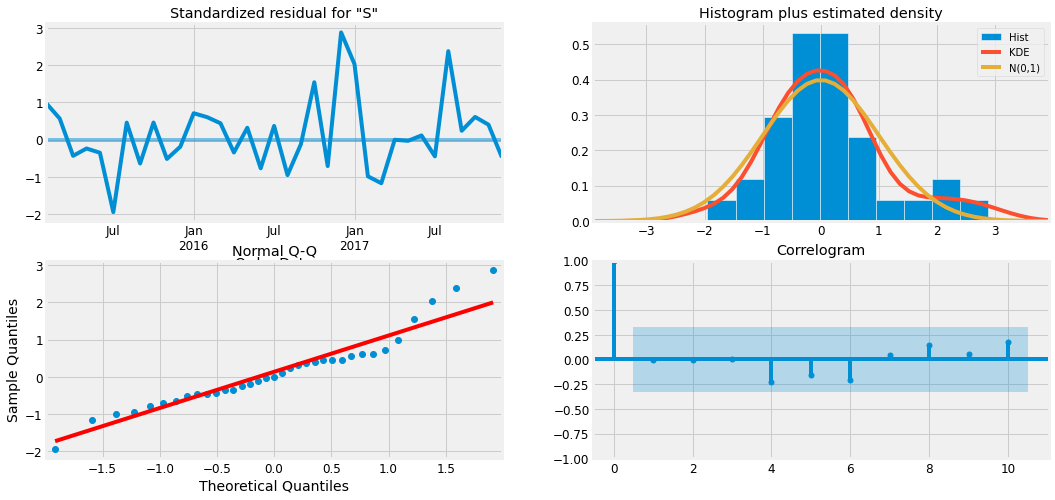

In [39]:
results_office.plot_diagnostics(figsize=(16, 8))
plt.show()

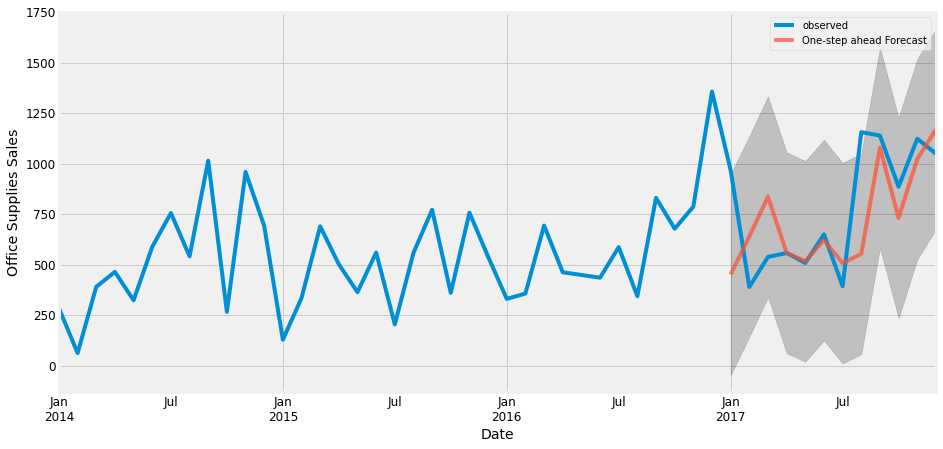

In [40]:
pred_office = results_office.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred_office.conf_int()

ax = y_office['2014':].plot(label='observed')
pred_office.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Office Supplies Sales')
plt.legend()

plt.show()

In [41]:
from sklearn.metrics import r2_score, mean_absolute_error
y_forecasted_office = pred_office.predicted_mean
y_truth_office = y_office['2017-01-01':]

# Compute the mean square error
mse_office = ((y_forecasted_office - y_truth_office) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse_office, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse_office), 2)))
print('The R-squared of our forecasts is {}'.format(r2_score(y_forecasted_office, y_truth_office)))
print("Mean absolute error value is ",mean_absolute_error(y_forecasted_office, y_truth_office))

The Mean Squared Error of our forecasts is 70427.02
The Root Mean Squared Error of our forecasts is 265.38
The R-squared of our forecasts is -0.2739676038725025
Mean absolute error value is  187.7795081241076


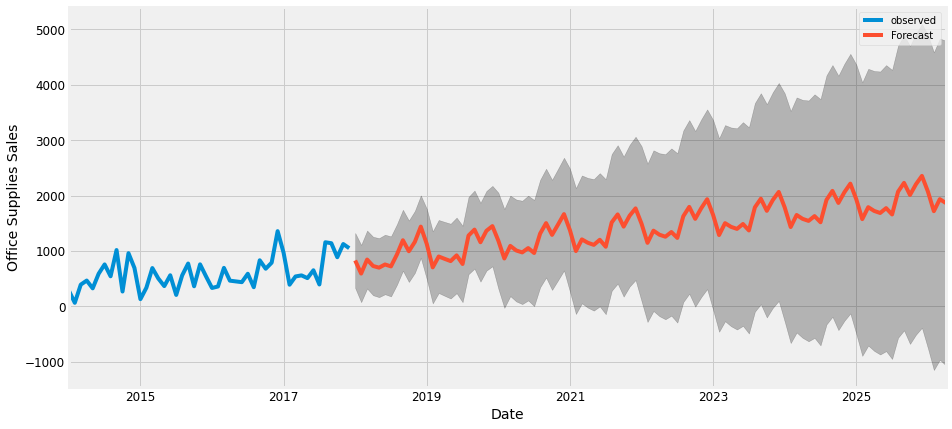

In [42]:
pred_uc_office = results_office.get_forecast(steps=100)
pred_ci_office = pred_uc_office.conf_int()

ax = y_office.plot(label='observed', figsize=(14, 7))
pred_uc_office.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci_office.index,
                pred_ci_office.iloc[:, 0],
                pred_ci_office.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Office Supplies Sales')

plt.legend()
plt.show()

### Results

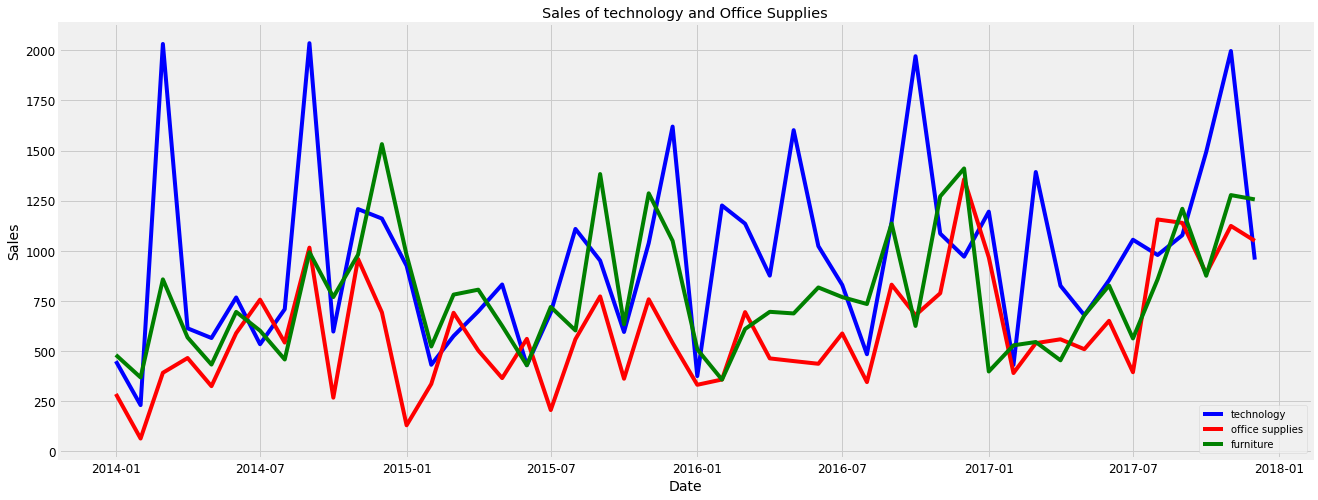

In [43]:
plt.figure(figsize=(20, 8))
plt.plot(store['Order Date'], store['technology_sales'], 'b-', label = 'technology')
plt.plot(store['Order Date'], store['office_sales'], 'r-', label = 'office supplies')
plt.plot(store['Order Date'], store['furniture_sales'], 'r-', label = 'furniture', color='green')
plt.xlabel('Date'); plt.ylabel('Sales'); plt.title('Sales of technology and Office Supplies')
plt.legend();

In [44]:
first_date_office = store.loc[np.min(list(np.where(store['office_sales'] > store['technology_sales'])[0])), 'Order Date']
first_date_furniture = store.loc[np.min(list(np.where(store['furniture_sales'] > store['technology_sales'])[0])), 'Order Date']
print("Office supplies first time produced higher sales than technology is {}.".format(first_date_office.date()))
print("Furniture first time produced higher sales than technology is {}.".format(first_date_furniture.date()))

Office supplies first time produced higher sales than technology is 2014-07-01.
Furniture first time produced higher sales than technology is 2014-01-01.


## Appendix A: ARIMA Model

[ARIMA](https://en.wikipedia.org/wiki/Autoregressive_integrated_moving_average) is short for ‘Auto Regressive Integrated Moving Average’ which is fitted to time series data either to better understand the data or to predict future points in the series (forecasting). ARIMA models are applied in some cases where data show evidence of non-stationarity in the sense of mean (but not variance/autocovariance), where an initial differencing step (corresponding to the "integrated" part of the model) can be applied one or more times to eliminate the non-stationarity of the mean function (i.e., the trend).

The AR part of ARIMA indicates that the evolving variable of interest is regressed on its own lagged (i.e., prior) values. The MA part indicates that the regression error is actually a linear combination of error terms whose values occurred contemporaneously and at various times in the past. The I (for "integrated") indicates that the data values have been replaced with the difference between their values and the previous values (and this differencing process may have been performed more than once). The purpose of each of these features is to make the model fit the data as well as possible.

Non-seasonal ARIMA models are generally denoted ARIMA(p,d,q) where parameters p, d, and q are non-negative integers, p is the order (number of time lags) of the autoregressive model, d is the degree of differencing (the number of times the data have had past values subtracted), and q is the order of the moving-average model. Seasonal ARIMA models are usually denoted ARIMA(p,d,q)(P,D,Q)$_m$, where m refers to the number of periods in each season, and the uppercase P,D,Q refer to the autoregressive, differencing, and moving average terms for the seasonal part of the ARIMA model.

Given time series data $X_t$ where $t$ is an integer index and the $X_t$ are real numbers, an ${\displaystyle {\text{ARMA}}(p',q)}{\displaystyle {\text{ARMA}}(p',q)}$ model is given by

${\displaystyle X_{t}-\alpha _{1}X_{t-1}-\dots -\alpha _{p'}X_{t-p'}=\varepsilon _{t}+\theta _{1}\varepsilon _{t-1}+\cdots +\theta _{q}\varepsilon _{t-q},}$

or equivalently by

$\left(1-\sum _{i=1}^{p'}\alpha _{i}L^{i}\right)X_{t}=\left(1+\sum _{i=1}^{q}\theta _{i}L^{i}\right)\varepsilon _{t}\,$

where ${\displaystyle L}L$ is the lag operator, the ${\displaystyle \alpha _{i}}\alpha _{i}$ are the parameters of the autoregressive part of the model, the ${\displaystyle \theta _{i}}\theta _{i}$ are the parameters of the moving average part and the ${\displaystyle \varepsilon _{t}}\varepsilon _{t}$ are error terms. The error terms ${\displaystyle \varepsilon _{t}}\varepsilon _{t}$ are generally assumed to be independent, identically distributed variables sampled from a normal distribution with zero mean.

Assume now that the polynomial ${\displaystyle \textstyle \left(1-\sum _{i=1}^{p'}\alpha _{i}L^{i}\right)}$ ${\displaystyle \textstyle \left(1-\sum _{i=1}^{p'}\alpha _{i}L^{i}\right)} $has a unit root (a factor ${\displaystyle (1-L)}{\displaystyle (1-L)}$) of multiplicity $d$. Then it can be rewritten as:

${\displaystyle \left(1-\sum _{i=1}^{p'}\alpha _{i}L^{i}\right)=\left(1-\sum _{i=1}^{p'-d}\varphi _{i}L^{i}\right)\left(1-L\right)^{d}.}$

An ARIMA(p,d,q) process expresses this polynomial factorisation property with $p=p'−d$, and is given by:

${\displaystyle \left(1-\sum _{i=1}^{p}\varphi _{i}L^{i}\right)(1-L)^{d}X_{t}=\left(1+\sum _{i=1}^{q}\theta _{i}L^{i}\right)\varepsilon _{t}\,}$

and thus can be thought as a particular case of an ARMA(p+d,q) process having the autoregressive polynomial with $d $ unit roots. (For this reason, no process that is accurately described by an ARIMA model with $d > 0$ is wide-sense stationary.)

The above can be generalized as follows.

${\displaystyle \left(1-\sum _{i=1}^{p}\varphi _{i}L^{i}\right)(1-L)^{d}X_{t}=\delta +\left(1+\sum _{i=1}^{q}\theta _{i}L^{i}\right)\varepsilon _{t}.\,}$

This defines an ARIMA(p,d,q) process with drift ${\displaystyle {\frac {\delta }{1-\sum \varphi _{i}}}}$.